# Perceptron

And Gate

In [2]:
# And Gate
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

# 예시 실행
print(AND(0, 0))  # 0
print(AND(1, 0))  # 0
print(AND(0, 1))  # 0
print(AND(1, 1))  # 1

0
0
0
1


OR Gate

In [3]:
# OR Gate
def OR(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    else:
        return 1

# 예시 실행
print(OR(0, 0))  # 0
print(OR(1, 0))  # 1
print(OR(0, 1))  # 1
print(OR(1, 1))  # 1

0
1
1
1


Not Gate

In [4]:
# NOT Gate (:/)
def NOT(x):
    w1, theta = -1, 0.5
    tmp = x*w1 + theta
    if tmp < theta:
        return 0
    else:
        return 1
# 예시 실행
print(NOT(0))  # 1
print(NOT(1))  # 0

1
0


XOR Gate

In [5]:
# XOR Gate

def XOR(x1, x2):
    # XOR 게이트는 AND, OR, NOT 게이트를 조합하여 구현
    return AND(OR(x1, x2), NOT(AND(x1, x2)))


print(XOR(0, 0))
print(XOR(0, 1))
print(XOR(1, 0))
print(XOR(1, 1))

0
1
1
0


Let's create MLP!

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense


2024-10-05 22:17:03.999485: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-05 22:17:04.045681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-05 22:17:04.719975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Sequential model

In [7]:
from tensorflow.keras.models import Sequential

model = Sequential([
    # Input Layer
    Dense(64), 

    # Hidden Layer
    Dense(32),              

    # Output Layer
    Dense(1) 
])

Subclassing Model

In [8]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = Dense(64)
        self.fc2 = Dense(32)
        self.fc3 = Dense(16)
        self.fc4 = Dense(1)

    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return self.fc4(x)

model = MyModel()

---

Let's Training MLP Model!!

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [10]:
# Load Data
(train_data, train_label), (test_data, test_label) = mnist.load_data()

# 데이터 전처리 (Data Normalization)
train_data = train_data / 255.0
test_data = test_data / 255.0


# Training Data와 Vaildation data 분리

# x : Input Data
# y : Label Data

x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size=0.2, random_state=42)



In [11]:
# 레이블을 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)


test_label = tf.keras.utils.to_categorical(test_label, 10)

In [12]:
import matplotlib.pyplot as plt

# 이미지 하나 출력
def plot_image(image_data, image_index):
  # 이미지 출력
  plt.imshow(image_data[image_index], cmap='gray', interpolation='nearest')
  plt.axis('off')
  plt.show()

  # 이미지 크기 출력
  image_shape = image_data[image_index].shape
  print("이미지 가로:", image_shape[1])
  print("이미지 세로:", image_shape[0])

  # 데이터셋 이미지 개수 출력
  num_images = image_data.shape[0]
  print("총 이미지 개수:", num_images)

# 여러 이미지 출력
def plot_images(images, cls_true, cls_pred=None):
  assert len(images) == len(cls_true) == 9
  fig, axes = plt.subplots(3, 3)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)

  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_xlabel("True: {0}".format(cls_true[i]))
    if cls_pred is not None:
      ax.set_title("Pred: {0}".format(cls_pred[i]))
    ax.axis('off')

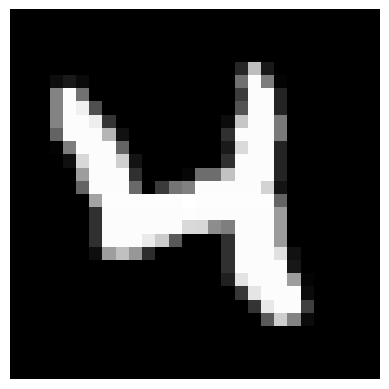

이미지 가로: 28
이미지 세로: 28
총 이미지 개수: 60000


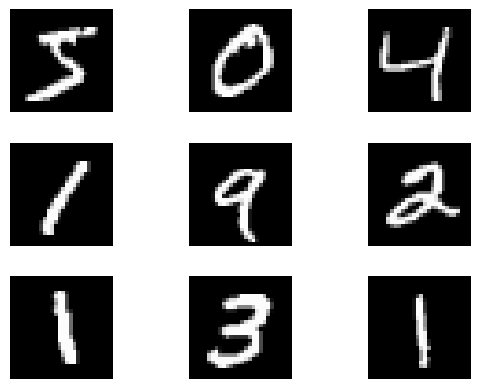

In [13]:
# 첫 번째 이미지 시각화
plot_image(train_data, 20)

# 여러 이미지 시각화 (예시: 첫 번째 9개 이미지)
plot_images(train_data[:9], train_data[:9])

In [14]:
# 모델 구성
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    Dense(10, activation='softmax')
])

/home/jihoney/anaconda3/envs/tf/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-10-05 22:17:06.534391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-05 22:17:06.567594: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-05 22:1

Your Custom MLP Model!

In [ ]:
### plz write code on here!

model = Custom_MLP_Model

In [21]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=20,
                    batch_size=128)

Epoch 1/20


I0000 00:00:1728118556.263664   10686 service.cc:145] XLA service 0x7134a40194f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728118556.263688   10686 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2024-10-05 17:55:56.291390: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-05 17:55:56.376648: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/375 ━━━━━━━━━━━━━━━━━━━━ 6:34 1s/step - accuracy: 0.0625 - loss: 2.3977

2024-10-05 17:55:56.770954: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:742] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
I0000 00:00:1728118556.938133   10686 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8190 - loss: 0.6257 - val_accuracy: 0.9146 - val_loss: 0.3011
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9152 - loss: 0.2976 - val_accuracy: 0.9195 - val_loss: 0.2908
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9243 - loss: 0.2754 - val_accuracy: 0.9180 - val_loss: 0.2972
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9246 - loss: 0.2680 - val_accuracy: 0.9215 - val_loss: 0.2806
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9271 - loss: 0.2621 - val_accuracy: 0.9238 - val_loss: 0.2801
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9314 - loss: 0.2487 - val_accuracy: 0.9215 - val_loss: 0.2884
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9302 - loss: 0.2561 - val_accuracy: 0.9192 - val_loss: 0.2930
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9305 - loss: 0.2509 - val_accuracy: 0.9218 - val_

In [26]:
# 모델 평가
test_loss, test_acc = model.evaluate(test_data, y_test)  # y_test로 평가
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9139 - loss: 0.3262
Test accuracy: 0.9241999983787537


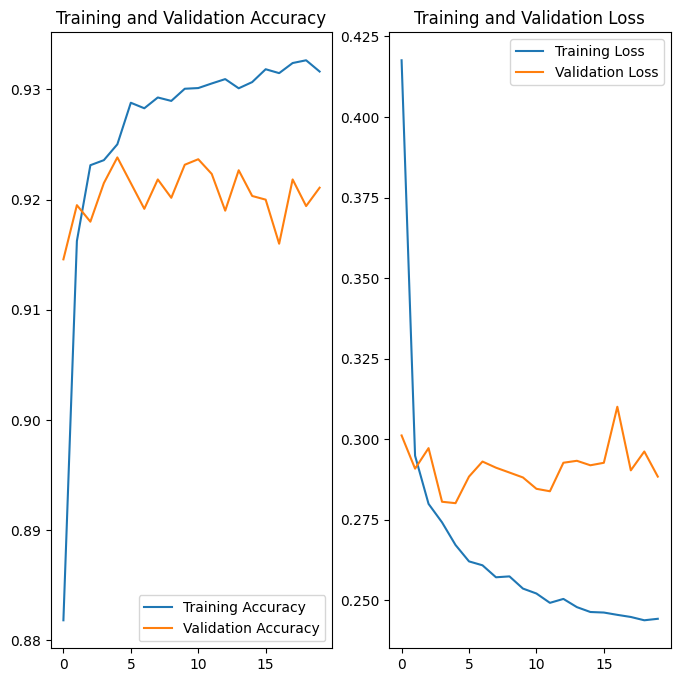

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()